# Lesson 5: Dimensionality Reduction

In this lab we are going to

- Understand and compute correlation and covariance
- Learn about Pearson and Spearman correlations
- Implement Principal Component Analysis (PCA)


##Questions for disscusion:

    1) How can we benifet from the correlation within a dataset?

    2) Why should we address the Multicollinearity in the dataset?


## Correlation and Covariance

Linear correlation can be measured with the Pearson correlation. It takes values between -1 and 1, where larger values indicate a stronger correlation, and 0 indicates no linear correlation. Here are some examples of features with varying degrees of correlation.

Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
Negative Correlation: variables change in opposite directions.

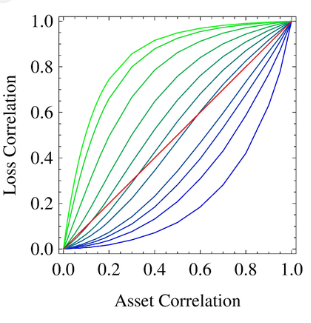

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


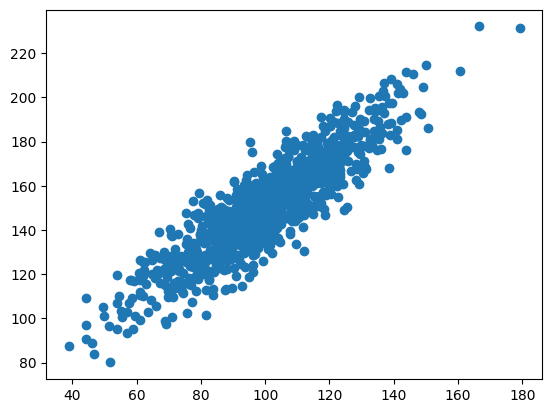

In [2]:
# generate related variables
import numpy as np
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

## Covariance

Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples.

This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted).

$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

The use of the mean in the calculation suggests the need for each data sample to have a Gaussian or Gaussian-like distribution.

### Exercise 1: Compute Covariance
Complete the following code. Calculate the covariance between `data1` and `data2`.

In [ ]:

cov_data1_data2 = # your code is here

print(cov_data1_data2)

In [ ]:
# Assert statement to check the correctness of the result
expected_cov_data1_data2 = np.array([[385.33297729, 389.7545618],
                                     [389.7545618,  500.38006058]])
assert np.allclose(cov_data1_data2, expected_cov_data1_data2, atol=0.1), "Covariance calculation is incorrect"

    3) How can we interpret the value of covariance?



## Pearson’s Correlation

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

In [ ]:
from scipy.stats import pearsonr

# let's calculate the Pearson correlation between data1 and data2
pearson_corr, _ = pearsonr(data1, data2)
pearson_corr

### Exercise 2: Compute Pearson's Correlation
Complete the following code. Calculate the Pearson correlation coefficient between `data1` and `data2`.

In [ ]:
from scipy.stats import pearsonr

# let's calculate the pearson's correlation coefficient between data1 and data2
p, _ = # your code is here

print(p)

In [ ]:
# Assert statement to check the correctness of the result
expected_p = 0.88
assert np.isclose(p, expected_p, atol=0.01), "Pearson's correlation coefficient calculation is incorrect"

## Spearman’s Correlation

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

Further, the two variables being considered may have a non-Gaussian distribution.

In this case, the Spearman’s correlation coefficient (named for Charles Spearman) can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank of values on each sample. This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.


$p = \frac{covariance(rank(X), rank(Y))}{stdv(rank(X)) * stdv(rank(Y))}$

A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. This is a mathematical name for an increasing or decreasing relationship between the two variables.

If you are unsure of the distribution and possible relationships between two variables, Spearman correlation coefficient is a good tool to use.

### Exercise 3: Compute Spearman's Correlation
Complete the following code. Calculate the Spearman correlation coefficient between `data1` and `data2`.

In [ ]:
from scipy.stats import spearmanr


corr, _ = # your code is here

print(corr)

0.8724050484050484


In [ ]:
# Assert statement to check the correctness of the result
expected_corr = 0.87
assert np.isclose(corr, expected_corr, atol=0.01), "Spearman's correlation coefficient calculation is incorrect"

To understand the Spearman correlation coefficient, let's generate a few synthetic examples that accentuate the how the coefficient works - before we dive into more natural examples. These examples will help us understand, for what type of relationships this coefficient is +1, -1, or close to zero.

Before generating the examples, we'll create a new helper functions, plot_data_corr(), that calls display_correlation() and plots the data against the X variable:

In [ ]:
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt
import pandas as pd

def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1,
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)


def plot_data_corr(df,title,color="green"):
    r = display_correlation(df)
    fig, ax = plt.subplots(nrows=1, ncols=len(df.columns)-1,figsize=(14,3))
    for i in range(1,len(df.columns)):
        ax[i-1].scatter(df["X"],df.values[:,i],color=color)
        ax[i-1].title.set_text(title[i] +'\n r = ' +
                             "{:.2f}".format(r.values[0,i]))
        ax[i-1].set(xlabel=df.columns[0],ylabel=df.columns[i])
    fig.subplots_adjust(wspace=.7)
    plt.show()

Let's generate a few monotonically increasing functions, using Numpy, and take a peek at the DataFrame once filled with the synthetic data:

In [ ]:
seed = 11
rand = np.random.RandomState(seed)
# Create a data frame using various monotonically increasing functions
x_incr = pd.DataFrame({"X":rand.uniform(0,10,100)})
x_incr["Line+"] = x_incr.X*2+1
x_incr["Sq+"] = x_incr.X**2
x_incr["Exp+"] = np.exp(x_incr.X)
x_incr["Cube+"] = (x_incr.X-5)**3

print(x_incr.head())

          X      Line+        Sq+         Exp+       Cube+
0  1.802697   4.605394   3.249716     6.065985  -32.685221
1  0.194752   1.389505   0.037929     1.215010 -110.955110
2  4.632185  10.264371  21.457140   102.738329   -0.049761
3  7.249339  15.498679  52.552920  1407.174809   11.380593
4  4.202036   9.404072  17.657107    66.822246   -0.508101


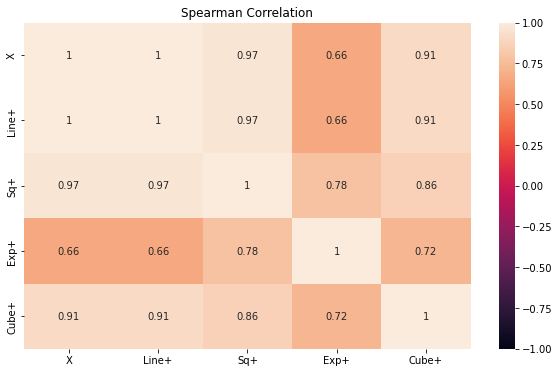

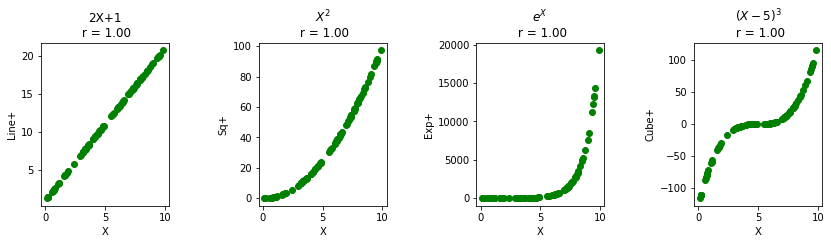

In [ ]:
plot_data_corr(x_incr,["X","2X+1","$X^2$","$e^X$","$(X-5)^3$"])

## Principal Component Analysis (PCA)

PCA process implementation steps:

1. Feature standardization.
2. Obtain the covariance matrix computation.
3. Calculate the eigendecomposition of the covariance matrix.
4. Sort the eigenvectors from the highest eigenvalue to the lowest.
5. Select the number of principal components.





let's have some discussion on the different aspects of| PCA.

    1) What are the advantages of using PCA?

    2) What are the disadvantages of using PCA?

The breast cancer dataset is a good example to illustrate PCA as it has a large number of features and that all the features’s data type are floating point numbers. Let’s load this dataset and print the feature names and the number of features in this dataset:

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

breast_cancer = load_breast_cancer()

print(breast_cancer.feature_names)
print(len(breast_cancer.feature_names))


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


Let’s also print out the target and examine the meaning of the target and the distribution of the target:

In [ ]:
print(breast_cancer.target)
print(breast_cancer.target_names)
print(np.array(np.unique(breast_cancer.target, return_counts=True)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

A target value of 0 means that the tumour is malignant while 1 means it is benign. The target is imbalanced, but not to a serious extent.

#### Examining the Relationship between Features and Target

At this juncture, it is useful to be able to visualize how each feature affects the diagnosis — whether a tumor is malignant or benign. So let’s plot a histogram for each feature and then differentiate the malignant and benign tumors using color:



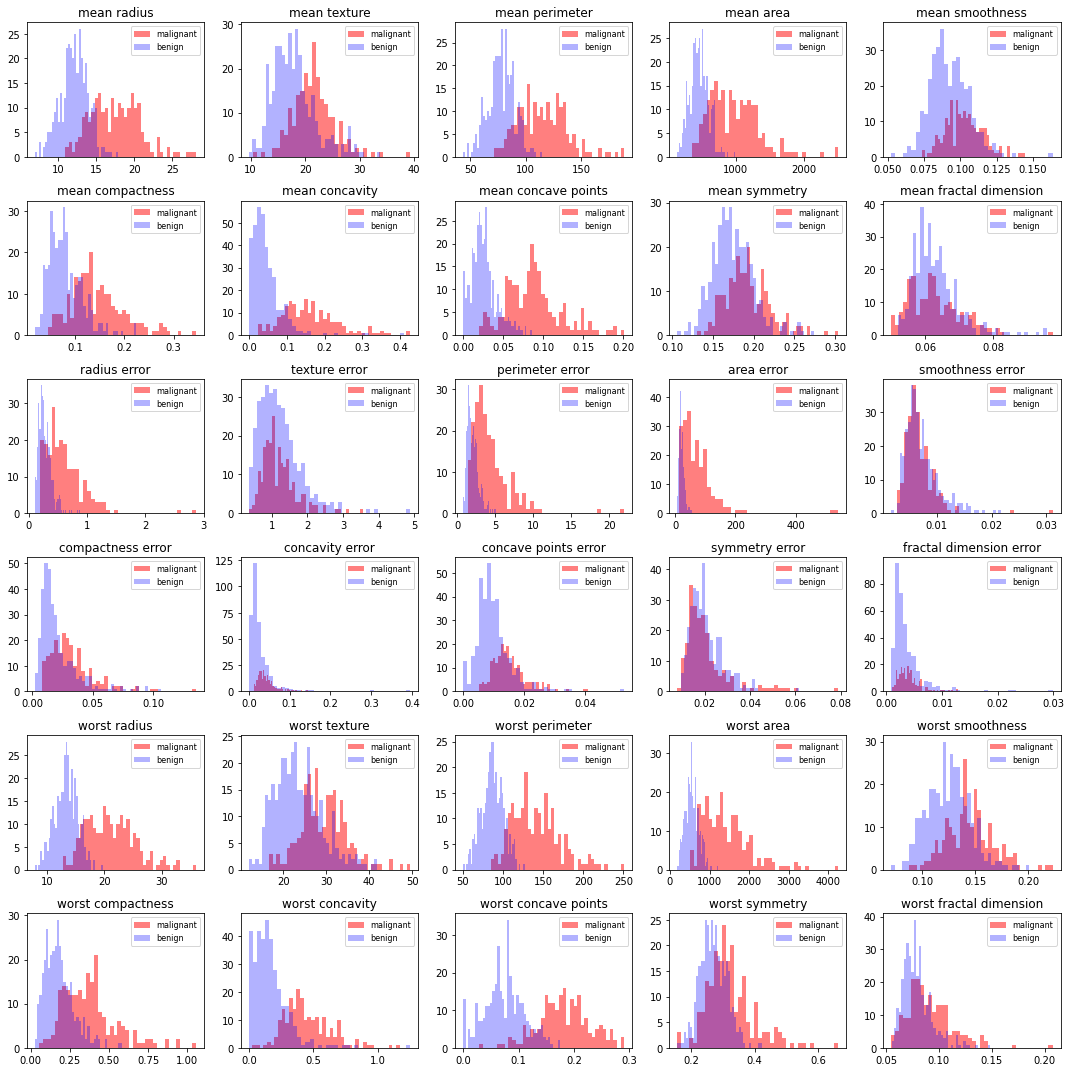

In [ ]:
_, axes = plt.subplots(6,5, figsize=(15, 15))
malignant = breast_cancer.data[breast_cancer.target==0]
benign = breast_cancer.data[breast_cancer.target==1]
ax = axes.ravel()                     # flatten the 2D array
for i in range(30):                   # for each of the 30 features
    bins = 40
    #---plot histogram for each feature---
    ax[i].hist(malignant[:,i], bins=bins, color='r', alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color='b', alpha=0.3)
    #---set the title---
    ax[i].set_title(breast_cancer.feature_names[i], fontsize=12)
    #---display the legend---
    ax[i].legend(['malignant','benign'], loc='best', fontsize=8)

plt.tight_layout()
plt.show()

Let's load the dataset into a Pandas DataFrame so that we can use for it several purposes:

In [ ]:
df = pd.DataFrame(breast_cancer.data,
                  columns = breast_cancer.feature_names)
df['diagnosis'] = breast_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Method 1 : Training the Model using all the Features



### Exercise 4:
complete the following code. use logistic regression to train a model using all the 30 features in the dataset and see how well it performs.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
#---perform a split with the given random state, shuffling and test size of 30% ---
random_state = 12
X_train, X_test, y_train, y_test = .....# your code is here ...........

#---train the model using Logistic Regression (you might set up 5K as a max_iter param)---
log_reg = .....# your code is here ...........


#---evaluate the model---
score = log_reg.score(X_test, y_test)
print(score)

In [ ]:
# Assert statement to check the correctness of the result

expected_score = 0.918
assert np.isclose(score, expected_score, atol=0.01), "Model accuracy is incorrect"

### Method 2 — Training the Model using Reduced Features

For the next method, let’s examine the various features and try to eliminate those features that are least correlated to the target. At the same time, we also want to remove those features that exhibit muli-collinearity. The aim is to reduce the number of features and see if the accuracy of the model can be improved.

##### Getting the Correlation Factors
Let’s first get the correlation of each feature with respect to the target (diagnosis):

In [ ]:
df_corr = df.corr()['diagnosis'].abs().sort_values(ascending=False)
df_corr

diagnosis                  1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

We then extract all those features that have relatively high correlation to the target (we arbitrarily set the threshold to 0.6):

In [ ]:
# get all the features that has at least 0.6 in correlation to the target
features = df_corr[df_corr > 0.6].index.to_list()[1:]
features                          # without the 'diagnosis' column

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area',
 'mean concavity',
 'worst concavity']

### Checking for MultiCollinearity

But it is clear that several features are correlated — for example, radius, perimeter, and area are all correlated. Some of these features must be removed.
Let’s remove those features that exhibits multi-collinearity:


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)

        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df,features)

,VIF,Tolerance
worst concave points,17.130560,0.058375
worst perimeter,204.329679,0.004894
mean concave points,34.546872,0.028946
worst radius,391.471018,0.002554
mean perimeter,1519.882563,0.000658
worst area,169.931222,0.005885
mean radius,1606.575820,0.000622
mean area,200.004550,0.005000
mean concavity,30.806430,0.032461
worst concavity,14.417687,0.069359


Our aim would be to remove those features that have VIF greater than 5. We can iteratively call the calculate_vif() function with different features until we have a feature-set that has all VIF values lesser than 5.

With some tries, we have narrowed down to 3 features:

In [ ]:
# try to reduce those feature that has high VIF until each feature
# has VIF less than 5
features = [
    'worst concave points',
    'mean radius',
    'mean concavity',
]
calculate_vif(df,features)

,VIF,Tolerance
worst concave points,4.759243,0.210117
mean radius,2.266584,0.441193
mean concavity,3.917617,0.255257


### Training the Model

With the 30 features reduced to 3, let’s now train the model using logistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.loc[:,features]            # get the reduced features in the
                                  # dataframe
y = df.loc[:,'diagnosis']
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.3,
                     shuffle = True,
                     random_state=random_state)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)


0.847953216374269

## Method 3 — Training the Model using Reduced Features (PCA)

Finally, let’s apply PCA to the dataset and see if a better model can be trained.



####Exercise 5: Performing Standard Scaling
complete the following code, to perform a standard scaling on the 30 features.

In [ ]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# performing standardization on the X set
standard_scaler =.....# your code is here ...........
X_scaled = .....# your code is here ...........

In [ ]:
# Assert statement to check the correctness of the scaling
# The mean of the scaled data should be close to 0 and the standard deviation should be close to 1
mean_scaled = np.mean(X_scaled, axis=0)
std_scaled = np.std(X_scaled, axis=0)

print(mean_scaled)
print(std_scaled)

assert np.allclose(mean_scaled, 0, atol=1e-6), "Mean of scaled features is not close to 0"
assert np.allclose(std_scaled, 1, atol=1e-6), "Standard deviation of scaled features is not close to 1"


####Exercise 6: Applying Principal Component Analysis (PCA)
complete the following code, to apply PCA to the features using the PCA class in the sklearn.decomposition module.

In [ ]:
from sklearn.decomposition import PCA
components = .....# your code is here ...........

# create a PCA object with the given components number above
pca = .....# your code is here ...........
# perform PCA on the scaled data (write one line below)


In [ ]:
# Assert statement to check the correctness of the PCA

explained_variance_ratio = np.sum(pca.explained_variance_ratio_)

print(explained_variance_ratio)

assert explained_variance_ratio >= 0.95, "Explained variance ratio is less than 0.95"

The initializer of the PCA class has a parameter named n_components. You can supply it one of the following values:

- an integer to indicate how many principal components you want to reduce the features to.

- a floating-point number between $0<n<1$ and it will return the number of components needed to capture the specified percentage of variability in the data. For example, if you want to find the number of components needed to capture 85% of the variability of the data, pass 0.85 to the n_components parameter.

- None. In this case, the number of components returned will be the same as the number of original features in the dataset



####Exercise 7: Applying Principal Component Analysis (PCA)
complete the following code, to write one line below to find the explained variance ratio from the pca.

In [ ]:
# print the explained variances
print("Variances (Percentage):")

# write one line below to find the explained variance ratio from the pca
explained_variances = .....# your code is here ...........

expl_vars = ["{:.2f}".format(a_float) for a_float in explained_variances]

#print(pca.explained_variance_ratio_ * 100)
print(expl_vars)


In [ ]:

# Assert statement to check the correctness of the explained variances
total_explained_variance = np.sum(pca.explained_variance_ratio_)

print("Total explained variance ratio:", total_explained_variance)

assert total_explained_variance >= 0.95, "Total explained variance ratio is less than 0.95"

So how do you interpret the above output? You can interpret it as follows:

- The first component alone captures about 44% variability in the data
- The second one captures about 19% variability in the data and so on.
- The 30 components altogether capture 100% variability in the data.

A much easier way to understand the above result is to print the cumulative variances:

In [ ]:
print("Cumulative Variances (Percentage):")
# write one line below to find the Cumulative Variances from the pca
cum_variances = pca.explained_variance_ratio_.cumsum() * 100

print(cum_variances)

Cumulative Variances (Percentage):
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]


You can now interpret the cumulative variances as follows:

- The first component alone captures about 44% variability in the data

- The first two components capture about 63% variability in the data and so on.

- The first 8 components together capture about 92.6% variability in the data.

A visual way to view the cumulative variances is to plot a scree plot.


####Exercise 8: visulize the variance changes
complete the following code, to plot a diagram which shows how the variance changes ove the number of components.

Text(0, 0.5, 'Explained variance (%)')

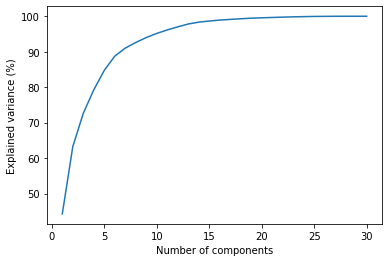

In [ ]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) if components is None else components

# plot a diagram which shows how the variance changes ove the number of components
plt.plot(.....# your code is here ...........)

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
# Assert statement to check that the cumulative explained variance reaches at least 95%
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)[-1]
assert cumulative_explained_variance >= 0.95, "Cumulative explained variance is less than 0.95"

print("Cumulative explained variance:", cumulative_explained_variance)

Let’s now apply PCA to find the desired number of components based on the desired explained variance, say 85%:

####Exercise 9:

 write two lines below to create a PCA object with 85% of variance (1), and apply on the X_scaled set

In [ ]:
from sklearn.decomposition import PCA

# write two lines below to create a PCA object with 85% of variance (1), and apply on the X_scaled set

pca = .....# your code is here ...........


print("Cumulative Variances (Percentage):")
cumulative_variances = np.cumsum(pca.explained_variance_ratio_ * 100)
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
# Assert statement to check that the cumulative explained variance reaches at least 85%
assert cumulative_variances[-1] >= 85, "Cumulative explained variance is less than 85%"

print("Cumulative explained variance is correct.")

And as you can see from the chart, 6 components are needed to cover 85% of the variability in the data.

You can also find out the importance of each feature that contributes to each of the components using the components_ attribute of the pca object:

In [ ]:
pca_components = abs(pca.components_)
print(pca_components)

[[2.18902444e-01 1.03724578e-01 2.27537293e-01 2.20994985e-01
  1.42589694e-01 2.39285354e-01 2.58400481e-01 2.60853758e-01
  1.38166959e-01 6.43633464e-02 2.05978776e-01 1.74280281e-02
  2.11325916e-01 2.02869635e-01 1.45314521e-02 1.70393451e-01
  1.53589790e-01 1.83417397e-01 4.24984216e-02 1.02568322e-01
  2.27996634e-01 1.04469325e-01 2.36639681e-01 2.24870533e-01
  1.27952561e-01 2.10095880e-01 2.28767533e-01 2.50885971e-01
  1.22904556e-01 1.31783943e-01]
 [2.33857132e-01 5.97060883e-02 2.15181361e-01 2.31076711e-01
  1.86113023e-01 1.51891610e-01 6.01653628e-02 3.47675005e-02
  1.90348770e-01 3.66575471e-01 1.05552152e-01 8.99796818e-02
  8.94572342e-02 1.52292628e-01 2.04430453e-01 2.32715896e-01
  1.97207283e-01 1.30321560e-01 1.83848000e-01 2.80092027e-01
  2.19866379e-01 4.54672983e-02 1.99878428e-01 2.19351858e-01
  1.72304352e-01 1.43593173e-01 9.79641143e-02 8.25723507e-03
  1.41883349e-01 2.75339469e-01]
 [8.53124284e-03 6.45499033e-02 9.31421972e-03 2.86995259e-02
  1.

In [ ]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)

    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]

    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['mean concave points', 'mean concavity', 'worst concave points', 'mean compactness']
Component 1: ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension', 'mean radius']
Component 2: ['texture error', 'smoothness error', 'symmetry error', 'worst symmetry']
Component 3: ['worst texture', 'mean texture', 'texture error', 'mean smoothness']
Component 4: ['mean smoothness', 'concavity error', 'worst smoothness', 'mean symmetry']
Component 5: ['worst symmetry', 'symmetry error', 'worst smoothness', 'mean symmetry']


### Transforming all the 30 Columns to the 6 Principal Components

You can now transform the standardized data of the 30 columns in the dataset to the 6 principal components:

In [ ]:
# apply the PCA on the X_scaled set
X_pca = pca.transform(X_scaled)

print(X_pca.shape)
print(X_pca)

(569, 6)
[[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511012  1.41142445]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177498  0.02865635]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859   0.54145215]
 ...
 [ 1.25617928 -1.90229671  0.56273053 -2.08922702  1.80999133 -0.53444719]
 [10.37479406  1.67201011 -1.87702933 -2.35603113 -0.03374193  0.56793647]
 [-5.4752433  -0.67063679  1.49044308 -2.29915714 -0.18470331  1.61783736]]


### Exercise 10: Creating a Machine Learning Pipeline

Complete the fllowing code, to create a machine learning pipeline so that we can formalize the entire process:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# create a standard scaler, pca with the found number of components and logistic regression model
_sc = .....# your code is here ...........
_pca = .....# your code is here ...........
_model = .....# your code is here ...........

log_regress_model_pip = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [ ]:
# Assert statement to verify the pipeline components
pipeline_steps = [step[0] for step in log_regress_model_pip.steps]
expected_steps = ['std_scaler', 'pca', 'regressor']
assert pipeline_steps == expected_steps, f"Pipeline steps are incorrect. Expected {expected_steps}, but got {pipeline_steps}"

print("Pipeline components are correct.")

We then split the dataset into training and testing sets and train the model using the training set:

In [ ]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.3,
                     shuffle=True,
                     random_state=random_state)

# train the model using the PCA components
log_regress_model_pip.fit(X_train,y_train)


Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('regressor', LogisticRegression())])

In [ ]:
log_regress_model_pip.score(X_test,y_test)

0.9707602339181286

## Conclusion
In this lesson, you learned about different types of correlation and how to compute them. You also learned about PCA and how to apply it to reduce the dimensionality of a dataset. It is important to understand these concepts as they are fundamental to many machine learning algorithms.

References:
- https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
- https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
- https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4
- https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e
- https://www.keboola.com/blog/pca-machine-learning